In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

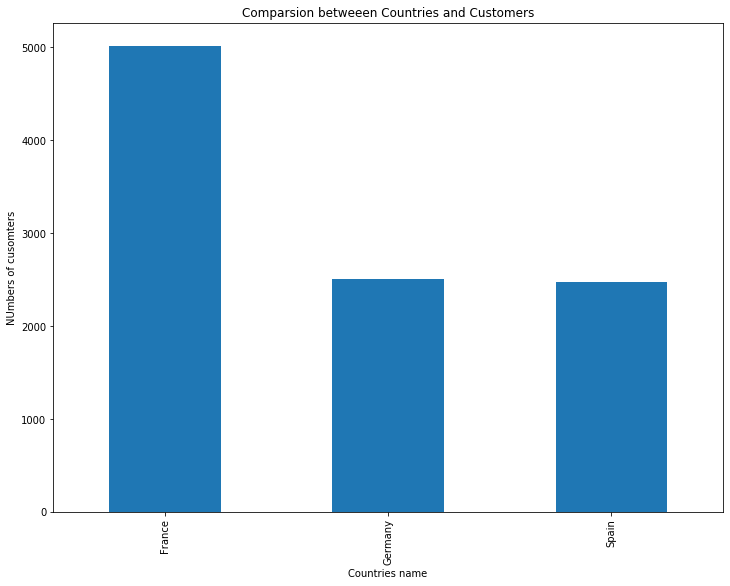

In [10]:
plt.figure(figsize = (12,9))
df['Geography'].value_counts().plot(kind = 'bar')
plt.xlabel('Countries name')
plt.ylabel('NUmbers of cusomters')
plt.title('Comparsion betweeen Countries and Customers')

In [11]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
classifier = Sequential()

In [17]:
classifier.add(Dense(6, activation='relu', input_dim=11))
classifier.add(Dense(6, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [19]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
fit_data = classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, validation_split=0.25)

Train on 5625 samples, validate on 1875 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5625/5625 [==============================] - 1s 91us/sample - loss: 0.5495 - acc: 0.7481 - val_loss: 0.4452 - val_acc: 0.8192
Epoch 2/100
5625/5625 [==============================] - 0s 68us/sample - loss: 0.4336 - acc: 0.8128 - val_loss: 0.4218 - val_acc: 0.8197
Epoch 3/100
5625/5625 [==============================] - 0s 69us/sample - loss: 0.4193 - acc: 0.8226 - val_loss: 0.4160 - val_acc: 0.8267
Epoch 4/100
5625/5625 [==============================] - 0s 70us/sample - loss: 0.4101 - acc: 0.8251 - val_loss: 0.4072 - val_acc: 0.8235
Epoch 5/100
5625/5625 [==============================] - 0s 68us/sample - loss: 0.4025 - acc: 0.8315 - val_loss: 0.4012 - val_acc: 0.8261
Epoch 6/100
5625/5625 [==============================] - 0s 67us/sample - loss: 0.3957 - acc: 0.8327 - val_loss: 0.3965 - val_acc: 0.8261
Epoch 7/100
5625/5625 [==============================] - 0s 67us/sample - lo

Epoch 58/100
5625/5625 [==============================] - 0s 71us/sample - loss: 0.3282 - acc: 0.8640 - val_loss: 0.3546 - val_acc: 0.8571
Epoch 59/100
5625/5625 [==============================] - 0s 70us/sample - loss: 0.3281 - acc: 0.8626 - val_loss: 0.3546 - val_acc: 0.8571
Epoch 60/100
5625/5625 [==============================] - 0s 69us/sample - loss: 0.3275 - acc: 0.8624 - val_loss: 0.3526 - val_acc: 0.8597
Epoch 61/100
5625/5625 [==============================] - 0s 68us/sample - loss: 0.3276 - acc: 0.8626 - val_loss: 0.3549 - val_acc: 0.8576
Epoch 62/100
5625/5625 [==============================] - 0s 68us/sample - loss: 0.3272 - acc: 0.8613 - val_loss: 0.3571 - val_acc: 0.8560
Epoch 63/100
5625/5625 [==============================] - 0s 71us/sample - loss: 0.3277 - acc: 0.8622 - val_loss: 0.3548 - val_acc: 0.8576
Epoch 64/100
5625/5625 [==============================] - 0s 72us/sample - loss: 0.3271 - acc: 0.8642 - val_loss: 0.3547 - val_acc: 0.8565
Epoch 65/100
5625/5625 [===

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1904,   78],
       [ 270,  248]])

In [26]:
accuracy_score(y_test, y_pred)

0.8608

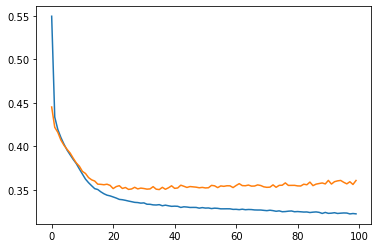

In [27]:
plt.plot(fit_data.history['loss'])
plt.plot(fit_data.history['val_loss'])